### ***IMPORTING PANDAS TO LOAD DATA***

In [33]:
!pip install numpy

In [2]:
!pip install pandas
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
data = pd.read_csv("messages.csv")
import warnings
warnings.filterwarnings('ignore')

In [3]:
data.head(50)

subject  \
0             job posting - apple-iss research center   
1                                                 NaN   
2   query : letter frequencies for text identifica...   
3                                                risk   
4                            request book information   
5   call for abstracts : optimality in syntactic t...   
6                 m . a . in scandinavian linguistics   
7   call for papers : linguistics session of the m...   
8                     foreign language in commercials   
9   fulbright announcement : please post / dissemi...   
10                        gala ' 95 : call for papers   
11  bu conf on language development ' 95 - announc...   
12                      korean software for macintosh   
13                                                NaN   
14  simultaneous prepositions and postpositions in...   
15             sum : imperatives without you subjects   
16                                           policies   
17  * * * correction to hellenistic greek announce...   
18                          question on audio samples   
19                                sexism and language   
20                          teaching english in korea   
21                                               free   
22                     email address for w . dressler   
23  dhumbadji ! , journal for the history of language   
24                question : quantitative information   
25                                       re : amharic   
26                                  uniformitarianism   
27        re : 6 . 1094 , qs : phonemicity of writing   
28         intensive summer arabic language institute   
29                    lists on comparative literature   
30                                 call for abstracts   
31                        call for papers ( rocling )   
32                                stress bibliography   
33                                 dependency grammar   
34                    call papers - systemic workshop   
35            re : 6 . 1049 , sum : e - mail citation   
36                                   job announcement   
37            address change / changement d ' adresse   
38                       the internet success toolbox   
39                 job announcement - academia sinica   
40                                penn working papers   
41                                           icslp 96   
42                                yiddish orthography   
43       recommendations on ling . font set for mac ?   
44                   gurt 1995 ( conference program )   
45                        q : german linguistic terms   
46                                     esl curriculum   
47                                             esslli   
48                                  disc . sex / lang   
49  re : 6 . 1078 , re : 1053 , english only ( bil...   

                                              message  label  
0   content - length : 3386 apple-iss research cen...      0  
1   lang classification grimes , joseph e . and ba...      0  
2   i am posting this inquiry for sergei atamas ( ...      0  
3   a colleague and i are researching the differin...      0  
4   earlier this morning i was on the phone with a...      0  
5   content - length : 4437 call for papers is the...      0  
6   m . a . in scandinavian linguistics at the uni...      0  
7   call for papers linguistics session - - midwes...      0  
8   content - length : 1937 greetings ! i ' m wond...      0  
9   fulbright announcement : please post / dissemi...      0  
10  groningen assembly on language acquisition 199...      0  
11  20th annual boston university conference on la...      0  
12  dear sir / madam , would you please send me an...      0  
13  syntax the antisymmetry of syntax richard s . ...      0  
14  i ' m looking for analyses of nominal construc...      0  
15  content - length : 3573 summary of responses t...      0  
16  moderators ' message a very happy 1995 to all ...      0  
17  

In [4]:
#CHECKING UP FOR MISSING VALUES 
data.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [5]:
#checking data duplication
duplicate_data = data[data.duplicated(['subject','message'], keep='first')]
duplicate_data_total = data.duplicated(['subject','message'], keep='first').sum()
print(duplicate_data)
print(duplicate_data_total)

                               subject  \
496   just released ! 10 million ! ! !   
1166  ld ' 98 - call for participation   
1353                        submit 600   
1438          afro - asiatic languages   
1617                                 .   
1618                             hello   
1735             just released vol . 2   
1810                    business offer   
2013                hi , how are you !   
2052  just released ! 10 million ! ! !   
2214                    special issues   
2375                 romance languages   
2559                              re :   
2575                              re :   
2598                              re :   
2670  submit 600 is definitely for you   
2688                        submit 600   

                                                message  label  
496   it was just released ! ! introducing . . . mil...      1  
1166  ld ' 98 the first international workshop on la...      0  
1353  this is not spam ; you are receiving this 

In [6]:
data_after_drop_duplicate = data.drop_duplicates(['subject','message'], keep='first', inplace=False, ignore_index=True)
data_after_drop_duplicate.shape

(2876, 3)

In [7]:
print("shape of data with duplicate {}".format(data.shape))
print("shape of data after removing duplicates {}".format(data_after_drop_duplicate.shape))

shape of data with duplicate (2893, 3)
shape of data after removing duplicates (2876, 3)


In [8]:
#checking all messages where subject is not present to check if there label is common or not
data_with_nan_subjects = data_after_drop_duplicate[data_after_drop_duplicate['subject'].isnull()]
data_with_nan_subjects

subject                                            message  label
1        NaN  lang classification grimes , joseph e . and ba...      0
13       NaN  syntax the antisymmetry of syntax richard s . ...      0
69       NaN  computational ling bengt sigurd ( ed ) compute...      0
107      NaN  phonology & phonetics burquest , donald a . an...      0
258      NaN  phonology & phonetics leiden in last : hil pho...      0
309      NaN  journal of japanese linguistics - - yasuaki ab...      0
314      NaN  mitwpl is happy to announce the publication of...      0
320      NaN  semantics 1 ) p . m . bertinetto , v . bianchi...      0
346      NaN  history of ling the magic of a common language...      0
368      NaN  lappin , shalom ( editor ) , ( school of orien...      0
369      NaN  history of ling the magic of a common language...      0
373      NaN  phonology & phonetics generative french phonol...      0
375      NaN  this will end all of the confusion ! when it c...      1
394      NaN  historical ling announcing le lingue indoeurop...      0
399      NaN  psycholinguistics aitchison , jean ( universit...      0
400      NaN  labov , william ( university of pennsylvania )...      0
402      NaN  hi . . . ever thought about starting your own ...      1
430      NaN  history of ling formigari , lia and daniele ga...      0
441      NaN  syntax marcus maia . the comprehension of obje...      0
448      NaN  lang acquisition the malfrfpirannssknir ( ling...      0
449      NaN  * * * * * * * * * * * * * * * * * * * * * * * ...      0
495      NaN  by sendmail ( 8 . 8 . 9 / 8 . 8 . 9 ) with smt...      1
518      NaN  discourse levinsohn , stephen h . ; discourse ...      0
527      NaN  lang acquisition lopez ornat , susana : la adq...      0
537      NaN  tsujimura , natsuko an introduction to japanes...      0
539      NaN  webelhuth , gert ( editor ) ; ( university of ...      0
576      NaN  sacks , harvey , ( edited by emanuel schegloff...      0
625      NaN  10 / 27 / 98 y2k solution ! 8 pine circle dr ....      1
853      NaN  increase your personal prestige and money earn...      1
868      NaN  a n n o u n c i n g cunyforum 18 , summer 1994...      0
891      NaN  journal of neurolinguistics - an international...      0
921      NaN  poetics - journal of empirical research on lit...      0
940      NaN  english for specific purposes - an internation...      0
949      NaN  discourse barsky , robert f . ( igrc , montrea...      0
958      NaN  university of massachusetts occasional papers ...      0
965      NaN  language & literature 3 / 3 ( 1994 ) : article...      0
972      NaN  syntax bhat , d . n . s . the adjectival categ...      0
981      NaN  proceedings from the workshop on compound noun...      0
990      NaN  language sciences editor : paul hopper , usa "...      0
1027     NaN  language and linguistics in melanesia , journa...      0
1037     NaN  speech communication - a publication of the eu...      0
1073     NaN  syntax wesley hudson . pragmatic constraints o...      0
1081     NaN  finnish helena halmari . a government approach...      0
1090     NaN  functional & systemic ling verhoeven , ludo . ...      0
1104     NaN  language 70 / 4 ( december , 1994 ) : articles...      0
1111     NaN  syntax c . s . rhys , d . adger and a . von kl...      0
1126     NaN  call for papers to the workshop connectionist ...      0
1140     NaN  bibliographies campe , petra . case , semantic...      0
1153     NaN  lang planning davis , kathryn anne language pl...      0
1268     NaN  need a photomask ? search no further . . . adt...      1
1629     NaN  data from : coffee @ northcoastcoffee . com to...      1
2056     NaN  negative concord i am trying to compile of lis...      0
2086     NaN  make $ 3500 per week using your home computer ...      1
2155     NaN  dictionaries crowley , t . a dictionary of paa...      0
2214     NaN  romance ling davis , stuart @ napoli , donna j...      0
2276     NaN  when it comes t

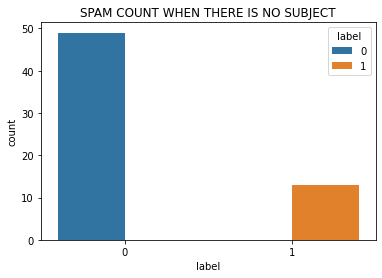

In [10]:
#let's see what is the distribution of label data in case of NaN subjects
!pip install seaborn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_with_nan_subjects,x='label',hue='label')
plt.title('SPAM COUNT WHEN THERE IS NO SUBJECT')
plt.show()

From the above plot we can see that based on subjects we cannot assume that an email is spam if it is not having a subject as the count of spam email without subject is low as compared to non spam.

In [11]:
#I will be using messages only for classification of spam or not spam
df1 = data_after_drop_duplicate[['message','label']]
df1.head(10)

message  label
0  content - length : 3386 apple-iss research cen...      0
1  lang classification grimes , joseph e . and ba...      0
2  i am posting this inquiry for sergei atamas ( ...      0
3  a colleague and i are researching the differin...      0
4  earlier this morning i was on the phone with a...      0
5  content - length : 4437 call for papers is the...      0
6  m . a . in scandinavian linguistics at the uni...      0
7  call for papers linguistics session - - midwes...      0
8  content - length : 1937 greetings ! i ' m wond...      0
9  fulbright announcement : please post / dissemi...      0

In [12]:
#New column for Length of message

In [13]:
df1['label'].value_counts()

0    2408
1     468
Name: label, dtype: int64

in our data set number of spam emails are 468 and number of non spam are 2408

### ***DATA CLEANING***

In [14]:
#lets look at some messages and find insights.
sent_0 = df1['message'].values[0]
print(sent_0)
print("="*50)
print('\n')
sent_1 = df1['message'].values[1]
print(sent_1)
print("="*50)
print('\n')
sent_2 = df1['message'].values[2]
print(sent_2)
print("="*50)
print('\n')
sent_3 = df1['message'].values[3]
print(sent_3)
print("="*50)
print('\n')

content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and 

from the above representation we can see that there are many special characters like (.,-@') etc, which should be removed, so I will use regex for removing all which doesn't starts with alphabet,I will also make every character in lower case, remove all the numbers

In [15]:
!pip install nltk
!pip install re
import nltk
import re
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')

  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)


ERROR: Could not find a version that satisfies the requirement re
ERROR: No matching distribution found for re
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
corpus = []
for i in range(len(df1)):
    review = re.sub('[^a-zA-Z]', ' ', df1['message'][i])  #from each row of message only keeping element which starts with albhabet
    review = re.sub('\[|\]', ' ', review)
    review = re.sub(' +|_+', ' ', review)
    review = review.lower() 
    review = word_tokenize(review)
    words = []
    for word in review:
        if len(word)>3:
            words.append(word)
    review_length = words
    
    word_lemmatize = []
    for wrd in review_length:
        if wrd not in set(stopwords.words('english')):
            word_lemmatize.append(WordNetLemmatizer().lemmatize(wrd))
    
    review_lemmatise = word_lemmatize
    review = ' '.join(review_lemmatise)          
    corpus.append(review)
    

In [18]:
corpus

['content length apple research center million joint venture apple computer institute system science national university singapore located singapore looking senior speech scientist successful candidate research expertise computational linguistics including natural language processing english chinese statistical language modeling knowledge state corpus based gram language model cache language model part speech language model required text speech project leader successful candidate research expertise expertise following area computational linguistics including natural language parsing lexical database design statistical language modeling text tokenization normalization prosodic analysis substantial knowledge phonology syntax semantics chinese required knowledge acoustic phonetics speech signal processing desirable candidate least year relevant work experience technical degree least year experienc strong software engineering skill including design implementation productization required po

In [19]:
len(corpus)

2876

In [20]:
import json
with open("corpus.txt", "w") as fp:
    json.dump(corpus, fp)

In [21]:
clean_message = pd.DataFrame(corpus)

In [22]:
df1['clean_message'] = clean_message

In [23]:
df1.head()

message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  lang classification grimes , joseph e . and ba...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   

                                       clean_message  
0  content length apple research center million j...  
1  lang classification grime joseph barbara grime...  
2  posting inquiry sergei atamas satamas umabnet ...  
3  colleague researching differing degree risk pe...  
4  earlier morning phone friend mine living south...

In [24]:
df1['length_clean_message'] = df1.clean_message.str.len()
df1['length_before_cleaning'] = df1.message.str.len()
df1.head(5)

message  label  \
0  content - length : 3386 apple-iss research cen...      0   
1  lang classification grimes , joseph e . and ba...      0   
2  i am posting this inquiry for sergei atamas ( ...      0   
3  a colleague and i are researching the differin...      0   
4  earlier this morning i was on the phone with a...      0   

                                       clean_message  length_clean_message  \
0  content length apple research center million j...                  1838   
1  lang classification grime joseph barbara grime...                  1201   
2  posting inquiry sergei atamas satamas umabnet ...                   867   
3  colleague researching differing degree risk pe...                   201   
4  earlier morning phone friend mine living south...                   566   

   length_before_cleaning  
0                    2856  
1                    1800  
2                    1435  
3                     324  
4                    1046

In [25]:
df1.to_csv('df1.csv')

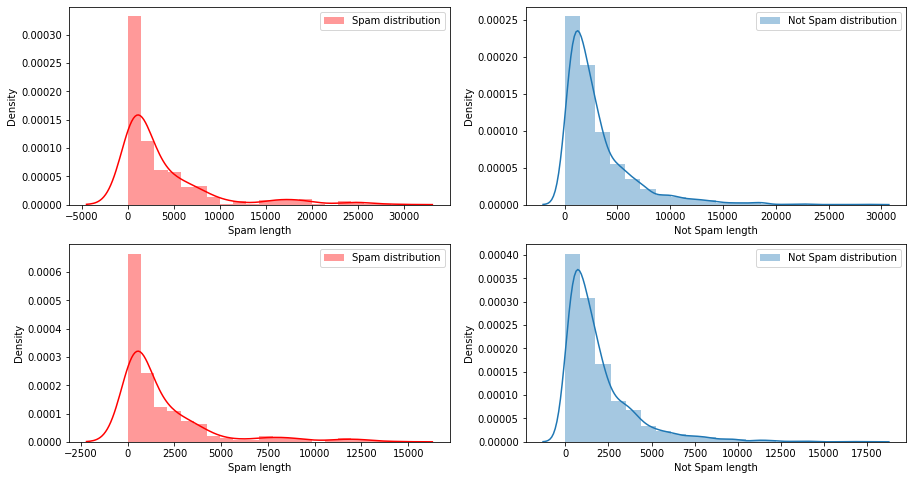

In [26]:
#lets visualise the distribution of spam and not spam in both cleaned and uncleaned messages

f,ax = plt.subplots(2,2,figsize = (15,8))

sns.distplot(df1[df1['label']==1]['length_before_cleaning'],bins=20,ax=ax[0,0],label='Spam distribution',color='r')

ax[0,0].set_xlabel('Spam length')
ax[0,0].legend()

sns.distplot(df1[df1['label']==0]['length_before_cleaning'],bins=20,ax=ax[0,1],label='Not Spam distribution')
ax[0,1].set_xlabel('Not Spam length')
ax[0,1].legend()

sns.distplot(df1[df1['label']==1]['length_clean_message'],bins=20,ax=ax[1,0],label='Spam distribution',color='r')

ax[1,0].set_xlabel('Spam length')
ax[1,0].legend()

sns.distplot(df1[df1['label']==0]['length_clean_message'],bins=20,ax=ax[1,1],label='Not Spam distribution')
ax[1,1].set_xlabel('Not Spam length')
ax[1,1].legend()

plt.show()

in both the cases and in both class we can see that the data is rightly skewed

In [27]:
#visualisation of word cloud for both spam and non spam to check which word occurs the most in both classes respectively.

In [28]:
!pip install wordcloud

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [30]:
#creating seperate data for spam and not spam messages
spam = df1[df1['label']==1]['clean_message']
not_spam = df1[df1['label']==0]['clean_message']

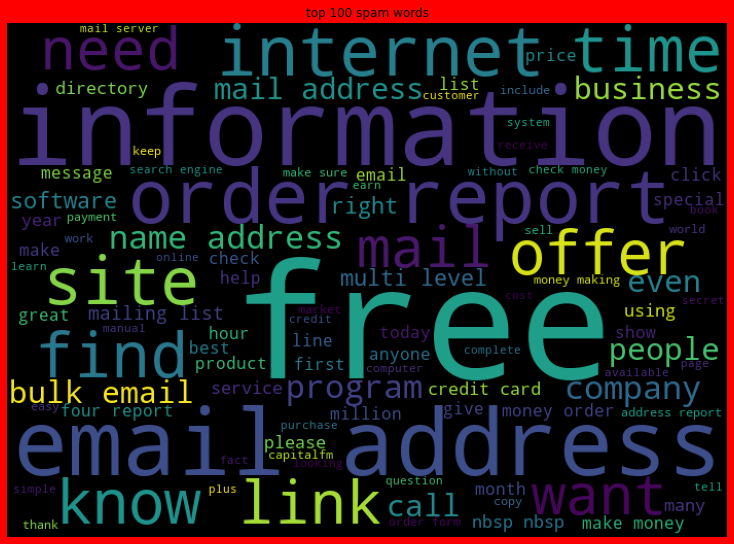

In [31]:
spam_cloud = WordCloud(width=700,height=500,max_words=100,mode="RGBA",prefer_horizontal=1).generate(' '.join(spam))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("top 100 spam words")
plt.show()

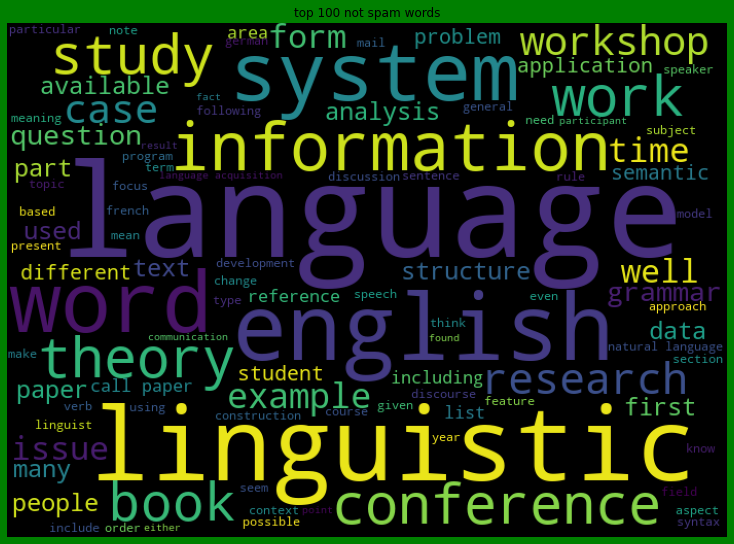

In [32]:
not_spam_cloud = WordCloud(width=700,height=500,max_words=100,mode="RGBA",prefer_horizontal=1).generate(' '.join(not_spam))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(not_spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("top 100 not spam words")
plt.show()

from the above plots we can see that words like Free, internet, offer, order, etc lies under spam

### ***NOW WILL BUILD MODEL USING BOW TF-IDF, WORD2VEC***

In [34]:
!pip install -U scikit-learn

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
#creating features and maximum number of features I am taking is 3000.
BOW_VEC = CountVectorizer(max_features=3000)
X_BOW = BOW_VEC.fit_transform(df1['clean_message'])

In [37]:
#this will show in how many data points each word occured, below words are our features which are 3000 dimention, means 3000 unique words
BOW_VEC.vocabulary_

{'content': 581,
 'length': 1534,
 'apple': 154,
 'research': 2299,
 'center': 399,
 'million': 1715,
 'joint': 1447,
 'computer': 539,
 'institute': 1361,
 'system': 2680,
 'science': 2392,
 'national': 1781,
 'university': 2852,
 'singapore': 2490,
 'located': 1583,
 'looking': 1594,
 'senior': 2434,
 'speech': 2552,
 'scientist': 2394,
 'successful': 2632,
 'candidate': 368,
 'expertise': 964,
 'computational': 538,
 'linguistics': 1562,
 'including': 1309,
 'natural': 1783,
 'language': 1496,
 'processing': 2107,
 'english': 885,
 'chinese': 431,
 'statistical': 2583,
 'modeling': 1734,
 'knowledge': 1481,
 'state': 2578,
 'corpus': 615,
 'based': 259,
 'model': 1733,
 'part': 1936,
 'required': 2296,
 'text': 2724,
 'project': 2123,
 'following': 1052,
 'area': 170,
 'parsing': 1935,
 'lexical': 1539,
 'database': 667,
 'design': 727,
 'prosodic': 2140,
 'analysis': 113,
 'substantial': 2629,
 'phonology': 1990,
 'syntax': 2677,
 'semantics': 2427,
 'acoustic': 25,
 'phonetics': 1

In [38]:
print(BOW_VEC.get_feature_names())

['ability', 'able', 'absence', 'absolutely', 'abstract', 'academic', 'academy', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'access', 'accessible', 'accommodation', 'accomodation', 'accompanied', 'accompanying', 'according', 'account', 'accurate', 'accurately', 'accusative', 'achieve', 'achievement', 'acoustic', 'acquire', 'acquired', 'acquiring', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actually', 'adam', 'adaptive', 'added', 'adding', 'addition', 'additional', 'address', 'addressed', 'addressing', 'adequate', 'adjective', 'adjunct', 'administration', 'administrative', 'adult', 'advance', 'advanced', 'advantage', 'adverb', 'adverbial', 'advertise', 'advertisement', 'advertising', 'advice', 'affect', 'affiliation', 'affix', 'afford', 'africa', 'african', 'afternoon', 'agency', 'agent', 'agree', 'agreed', 'agreement', 'aided', 'aim', 'airport', 'aisb', 'alan', 'alberta', 'album', 'alex', 'alexander', 'alexis', 'algonquian', 'algorithm', 'alice'

In [39]:
print(X_BOW.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
y = df1['label']

In [41]:
df_BOW = pd.DataFrame(X_BOW.todense(),columns=BOW_VEC.get_feature_names())

In [42]:
df_BOW.drop('label',axis=1,inplace=True)

In [43]:
df_BOW.shape

(2876, 2999)

In [44]:
df_BOW.head()

ability  able  absence  absolutely  abstract  academic  academy  accent  \
0        0     0        0           0         0         0        0       0   
1        0     0        0           0         0         3        0       0   
2        0     0        0           0         0         0        0       0   
3        0     0        0           0         0         0        0       0   
4        0     0        0           0         0         0        0       0   

   accept  acceptable  acceptance  accepted  access  accessible  \
0       0           0           0         0       0           0   
1       0           0           0         0       0           1   
2       0           0           0         0       0           0   
3       0           0           0         0       0           0   
4       0           0           0         0       0           0   

   accommodation  accomodation  accompanied  accompanying  according  account  \
0              0             0            0             0          0        0   
1              0             0            0             0          0        0   
2              0             0            0             0          0        0   
3              0             0            0             0          0        0   
4              0             0            0             0          0        0   

   accurate  accurately  accusative  achieve  achievement  acoustic  acquire  \
0         0           0           0        0            0         1        0   
1         0           0           0        0            0         0        0   
2         0           0           0        0            0         0        0   
3         0           0           0        0            0         0        0   
4         0           0           0        0            0         0        0   

   acquired  acquiring  acquisition  across  action  active  activity  actual  \
0         0          0            0       0       0       0         0       0   
1         0          0            0       0       0       0         0       0   
2         0          0            0       0       0       0         0       0   
3         0          0            0       0       0       0         0       0   
4         0          0            0       0       0       0         0       0   

   actually  adam  adaptive  added  adding  addition  additional  address  \
0         0     0         0      0       0         0           0        0   
1         0     0         0      0       0         0           0        0   
2         1     0         0      0       0         0           0        1   
3         0     0         0      0       0         0           0        0   
4         0     0         0      0       0         0           0        0   

   addressed  addressing  adequate  adjective  adjunct  administration  \
0          0           0         0          0        0               0   
1          0           0         0          0        0               0   
2          0           0         0          0        0               0   
3          0           0         0          0        0               0   
4          0           0         0          0        0               0   

   administrative  adult  advance  advanced  advantage  adverb  adverbial  \
0               0      0        0         0          1       0          0   
1               0      0        0         0          0       0          0   
2               0      0        0         0          0       0          0   
3               0      0        0         0          0       0          0   
4               0      0        0         0          0       0          0   

   advertise  advertisement  advertising  advice  affect  affiliation  affix  \
0          0              0            0       0       0            0      0   
1          0              0            0       0       0            0      0   
2          0              0            0       0       0         

In [45]:
import numpy as np
from sklearn.manifold import TSNE

In [46]:
input_data_BOW = df_BOW
label = df1['label']

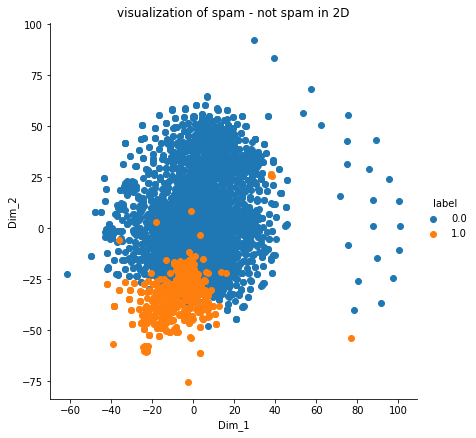

In [47]:
model = TSNE(n_components=2,perplexity=30,n_iter=1000,n_jobs=-1,random_state=0)
tsne_data_BOW = model.fit_transform(input_data_BOW)


# creating a new data frame which help us in ploting the result data
tsne_data_BOW = np.vstack((tsne_data_BOW.T, label)).T
tsne_BOW_df = pd.DataFrame(data=tsne_data_BOW, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_BOW_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("visualization of spam - not spam in 2D")
plt.show()

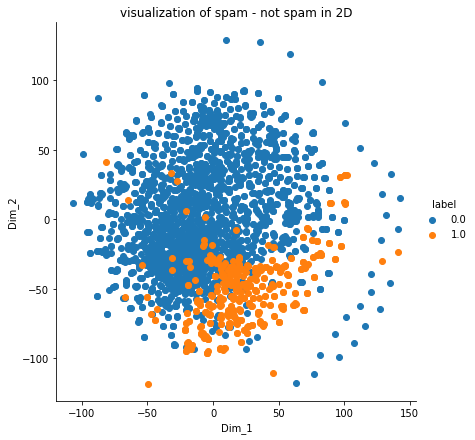

In [48]:
model = TSNE(n_components=2,perplexity=2,n_iter=1000,n_jobs=-1,random_state=0)
tsne_data_BOW = model.fit_transform(input_data_BOW)


# creating a new data frame which help us in ploting the result data
tsne_data_BOW = np.vstack((tsne_data_BOW.T, label)).T
tsne_BOW_df = pd.DataFrame(data=tsne_data_BOW, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_BOW_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("visualization of spam - not spam in 2D")
plt.show()

***From above plots, if we notice when the perplexity is very minimum there is more overlaping of data points hence hard to classify them, t-SNE is the best way to visualize high dimentional data***

best way to learn t-SNE https://distill.pub/2016/misread-tsne/

***For model building I will use naive bayes, as naive bayes is the base algorithm used for text classification. Using BernoulliNB as we have 2 class to predict and BernoulliNB works fine when the outcomes are binomial***

In [49]:
#Building model using naive bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve

In [50]:
X_train_bow,X_test_bow,y_train_bow,y_test_bow = train_test_split(X_BOW,y,test_size = 0.3, random_state=42)

In [51]:
print('shape of X_train is {}'.format(X_train_bow.shape))
print('shape of X_test is {}'.format(X_test_bow.shape))
print('shape of y_train is {}'.format(y_train_bow.shape))
print('shape of y_train is {}'.format(y_test_bow.shape))

shape of X_train is (2013, 3000)
shape of X_test is (863, 3000)
shape of y_train is (2013,)
shape of y_train is (863,)


In [52]:
naive_model = BernoulliNB()

In [53]:
model_BOW = naive_model.fit(X_train_bow,y_train_bow)

In [54]:
model_predict_BOW = naive_model.predict(X_test_bow)

In [55]:
print ('Final score : ', accuracy_score(y_test_bow,model_predict_BOW))
print('*'*50)
print('Classification report :','\n', classification_report(y_test_bow,model_predict_BOW))
print('*'*50)
print('confusion matrix : ', '\n', confusion_matrix(y_test_bow,model_predict_BOW))

Final score :  0.9930475086906141
**************************************************
Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       719
           1       0.99      0.97      0.98       144

    accuracy                           0.99       863
   macro avg       0.99      0.98      0.99       863
weighted avg       0.99      0.99      0.99       863

**************************************************
confusion matrix :  
 [[717   2]
 [  4 140]]


In [56]:
#roc
pred_prob_BOW = model_BOW.predict_proba(X_test_bow)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_bow, pred_prob_BOW)

***Creating model using tf-idf (term frequency - inverse document frequency***

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tf_VEC = TfidfVectorizer(max_features=3000)
X_tf = tf_VEC.fit_transform(df1['clean_message'])

In [59]:
tf_VEC.vocabulary_

{'content': 581,
 'length': 1534,
 'apple': 154,
 'research': 2299,
 'center': 399,
 'million': 1715,
 'joint': 1447,
 'computer': 539,
 'institute': 1361,
 'system': 2680,
 'science': 2392,
 'national': 1781,
 'university': 2852,
 'singapore': 2490,
 'located': 1583,
 'looking': 1594,
 'senior': 2434,
 'speech': 2552,
 'scientist': 2394,
 'successful': 2632,
 'candidate': 368,
 'expertise': 964,
 'computational': 538,
 'linguistics': 1562,
 'including': 1309,
 'natural': 1783,
 'language': 1496,
 'processing': 2107,
 'english': 885,
 'chinese': 431,
 'statistical': 2583,
 'modeling': 1734,
 'knowledge': 1481,
 'state': 2578,
 'corpus': 615,
 'based': 259,
 'model': 1733,
 'part': 1936,
 'required': 2296,
 'text': 2724,
 'project': 2123,
 'following': 1052,
 'area': 170,
 'parsing': 1935,
 'lexical': 1539,
 'database': 667,
 'design': 727,
 'prosodic': 2140,
 'analysis': 113,
 'substantial': 2629,
 'phonology': 1990,
 'syntax': 2677,
 'semantics': 2427,
 'acoustic': 25,
 'phonetics': 1

In [60]:
print(tf_VEC.get_feature_names())

['ability', 'able', 'absence', 'absolutely', 'abstract', 'academic', 'academy', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'access', 'accessible', 'accommodation', 'accomodation', 'accompanied', 'accompanying', 'according', 'account', 'accurate', 'accurately', 'accusative', 'achieve', 'achievement', 'acoustic', 'acquire', 'acquired', 'acquiring', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actually', 'adam', 'adaptive', 'added', 'adding', 'addition', 'additional', 'address', 'addressed', 'addressing', 'adequate', 'adjective', 'adjunct', 'administration', 'administrative', 'adult', 'advance', 'advanced', 'advantage', 'adverb', 'adverbial', 'advertise', 'advertisement', 'advertising', 'advice', 'affect', 'affiliation', 'affix', 'afford', 'africa', 'african', 'afternoon', 'agency', 'agent', 'agree', 'agreed', 'agreement', 'aided', 'aim', 'airport', 'aisb', 'alan', 'alberta', 'album', 'alex', 'alexander', 'alexis', 'algonquian', 'algorithm', 'alice'

In [61]:
print(X_tf.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04364303 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [62]:
y = df1['label']

In [63]:
df_tf = pd.DataFrame(X_tf.todense(),columns=tf_VEC.get_feature_names())

In [64]:
df_tf.shape

(2876, 3000)

In [65]:
X_train_tf,X_test_tf,y_train_tf,y_test_tf = train_test_split(X_tf,y,test_size = 0.3, random_state=42)
model_tf = naive_model.fit(X_train_tf,y_train_tf)
model_predict_tf = naive_model.predict(X_test_tf)

In [66]:
print ('Final score : ', accuracy_score(y_test_tf,model_predict_tf))
print('*'*50)
print('Classification report :','\n', classification_report(y_test_tf,model_predict_tf))
print('*'*50)
print('confusion matrix : ', '\n', confusion_matrix(y_test_tf,model_predict_tf))

Final score :  0.9930475086906141
**************************************************
Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       719
           1       0.99      0.97      0.98       144

    accuracy                           0.99       863
   macro avg       0.99      0.98      0.99       863
weighted avg       0.99      0.99      0.99       863

**************************************************
confusion matrix :  
 [[717   2]
 [  4 140]]


In [67]:
#roc
pred_prob_tf = model_tf.predict_proba(X_test_tf)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test_tf, pred_prob_tf)

***TRYING BUILNDING MODEL USING OTHER MACHINE LEARNING ALG.***

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [70]:
model_svc = SVC()

In [71]:
svc_model_BOW = model_svc.fit(X_train_bow,y_train_bow)

In [72]:
svc_predict_BOW = model_svc.predict(X_test_bow)

In [73]:
print ('Final score : ', accuracy_score(y_test_bow,svc_predict_BOW))
print('*'*50)
print('Classification report :','\n', classification_report(y_test_bow,svc_predict_BOW))
print('*'*50)
print('confusion matrix : ', '\n', confusion_matrix(y_test_bow,svc_predict_BOW))

Final score :  0.9409038238702202
**************************************************
Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       719
           1       0.98      0.66      0.79       144

    accuracy                           0.94       863
   macro avg       0.96      0.83      0.88       863
weighted avg       0.94      0.94      0.94       863

**************************************************
confusion matrix :  
 [[717   2]
 [ 49  95]]


In [74]:
#using grid search cv for SVM
grid = GridSearchCV(model_svc,param_grid,refit = True, verbose=2)
grid.fit(X_train_bow,y_train_bow)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......................C=1, gamma=0.1, 

[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END .................C=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [75]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [76]:
model_svc = SVC(C=1,gamma=1,kernel='linear',probability=True)
svc_model_BOW = model_svc.fit(X_train_bow,y_train_bow)
svc_predict_BOW = model_svc.predict(X_test_bow)
print ('Final score : ', accuracy_score(y_test_bow,svc_predict_BOW))
print('*'*50)
print('Classification report :','\n', classification_report(y_test_bow,svc_predict_BOW))
print('*'*50)
print('confusion matrix : ', '\n', confusion_matrix(y_test_bow,svc_predict_BOW))

Final score :  0.984936268829664
**************************************************
Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       719
           1       0.95      0.97      0.96       144

    accuracy                           0.98       863
   macro avg       0.97      0.98      0.97       863
weighted avg       0.99      0.98      0.98       863

**************************************************
confusion matrix :  
 [[711   8]
 [  5 139]]


In [77]:
#roc
pred_prob_svc = model_svc.predict_proba(X_test_bow)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test_bow, pred_prob_svc)

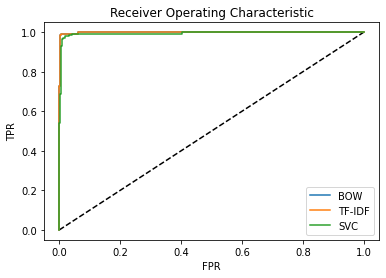

In [78]:
#plotting roc-auc curve for both models
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "BOW",)
plt.plot(fpr2, tpr2, label= "TF-IDF")
plt.plot(fpr3, tpr3, label= "SVC")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

***We can see that naive bayes is performing better than support vector classifier in every metrics***

In [79]:
#saving the model
import pickle

In [83]:
file = "modeltf.pkl"
pickle.dump(naive_model,open(file,'wb'))

In [81]:
pickle.dump(tf_VEC, open('transform.pkl', 'wb'))